In [53]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import copy
import os

from test_simplify import test_basic, batch_predict,load_net
from predict_batch import load_net as load_net_advanced
from test_batch import collect_predict,adaptive_chain_smoother,load_predict,interpolation_collected,choose_chain_collected,test_arrow,supplement_delta_smoothed,chain_list_desc

In [2]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [26]:
def plot_trace(x,y, alpha=1.0):
    n = x.shape[0]
    plt.plot(x[:n//3],y[:n//3],'-o',color='r', alpha=alpha)
    plt.plot(x[n//3:n//3*2],y[n//3:n//3*2],'-o',color='g', alpha=alpha)
    plt.plot(x[n//3*2:],y[n//3*2:],'-o',color='b', alpha=alpha)


In [3]:
smoother = lambda arr: adaptive_chain_smoother(arr, F=6)

In [4]:
loaded_raw = load_predict('hiv00800_cache')

In [5]:
loaded = copy.deepcopy(loaded_raw)
collected = collect_predict(loaded, chain_smoother=smoother, jump_tol=60, pixel_threshold = 70, verbose=True)
sorted([len(chain) for chain in collected['chain_list']], reverse=True)

21 chain detected


[12944,
 12862,
 1749,
 1732,
 1716,
 1667,
 1659,
 1632,
 1628,
 1376,
 1319,
 1230,
 955,
 919,
 877,
 737,
 83,
 7,
 3,
 2,
 1]

In [6]:
collected = interpolation_collected(collected)

In [7]:
collected = choose_chain_collected(collected, 100)

In [9]:
ordered_chain_list = sorted([chain for chain in collected['chain_list']], reverse=True, key=len)
[len(chain) for chain in ordered_chain_list]

[12951,
 12951,
 1771,
 1733,
 1720,
 1667,
 1660,
 1636,
 1629,
 1376,
 1372,
 1319,
 955,
 919,
 877,
 739,
 146]

In [19]:
for chain in collected['chain_list']:
    supplement_delta_smoothed(chain)


12951


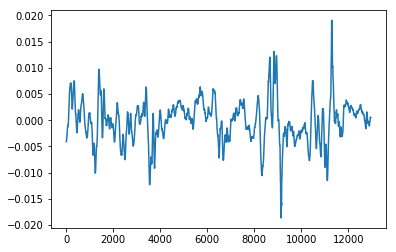

12951


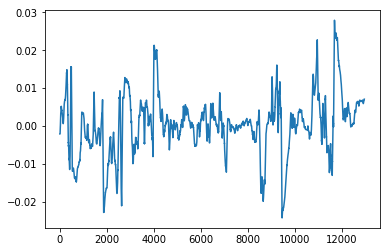

1771


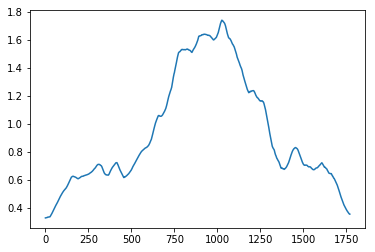

1733


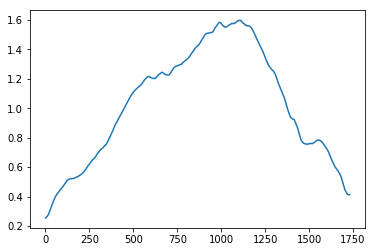

1720


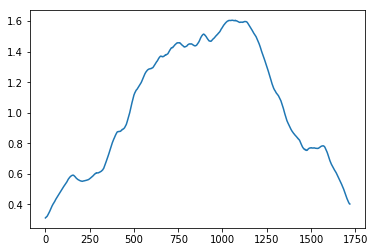

1667


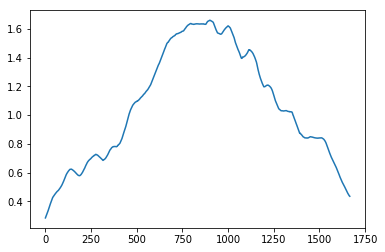

1660


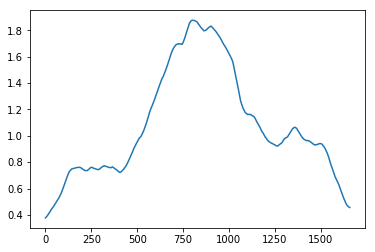

1636


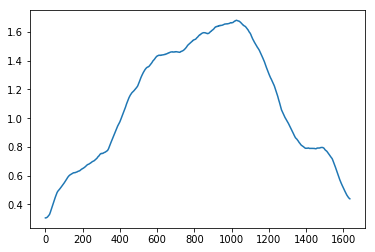

1629


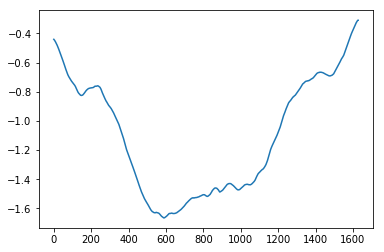

1376


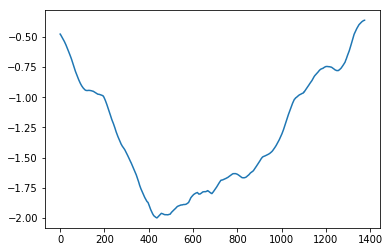

1372


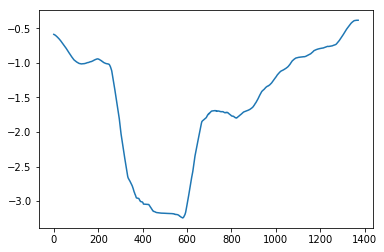

1319


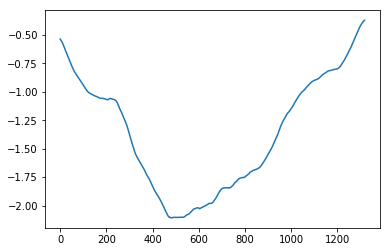

955


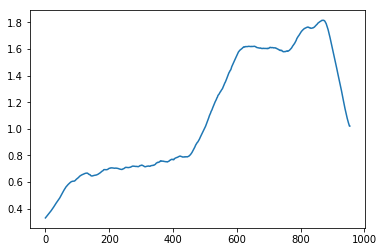

919


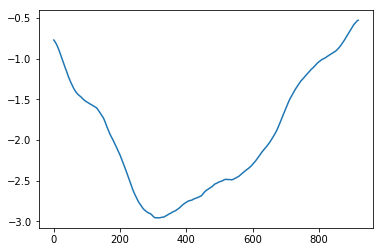

877


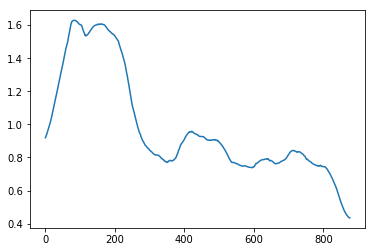

739


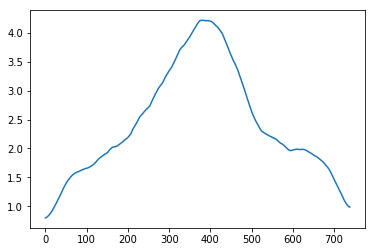

146


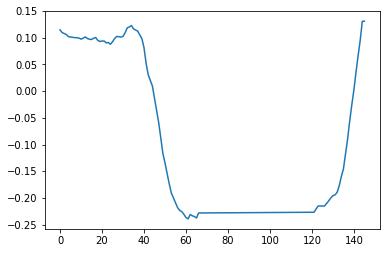

In [20]:
for chain in ordered_chain_list:
    print(len(chain))
    plt.plot([box['delta_smoothed'][0] for box in chain])
    plt.show()

In [24]:
chain_list_desc(ordered_chain_list)


12951


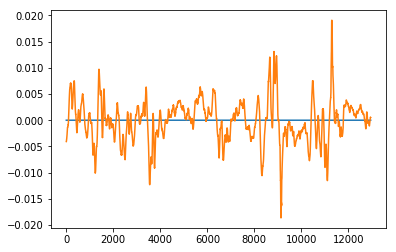

12951


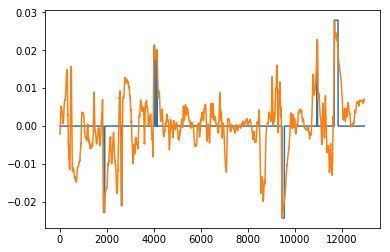

1771


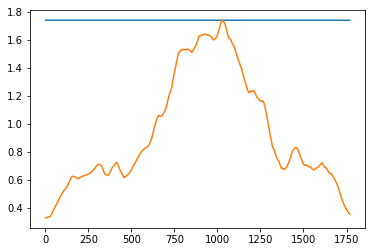

1733


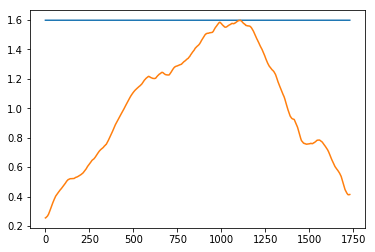

1720


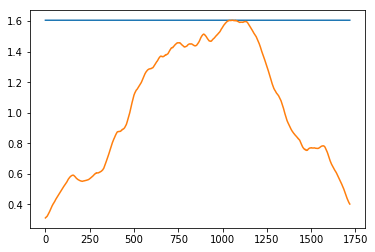

1667


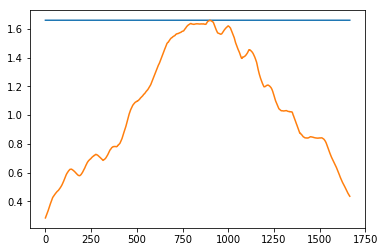

1660


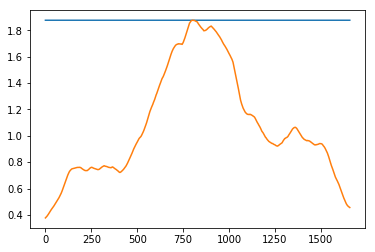

1636


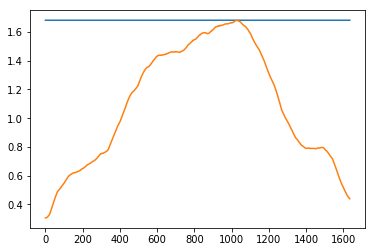

1629


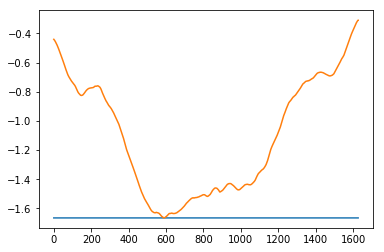

1376


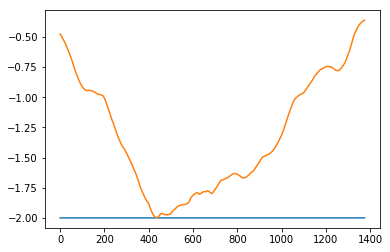

1372


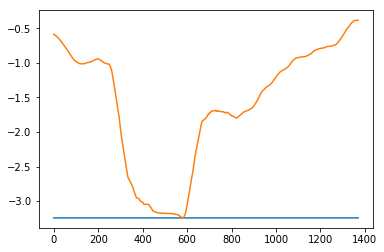

1319


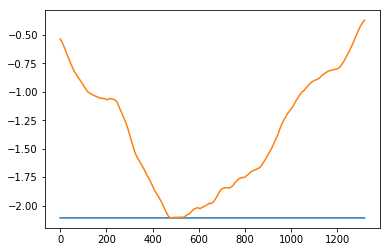

955


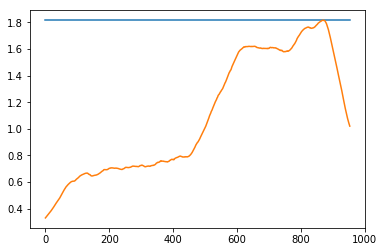

919


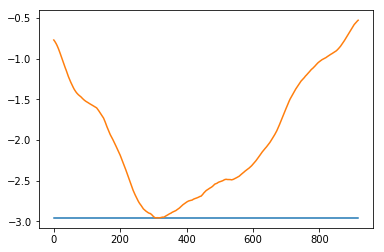

877


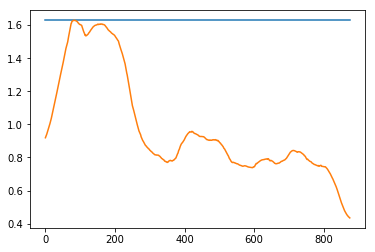

739


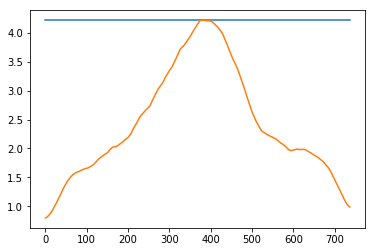

146


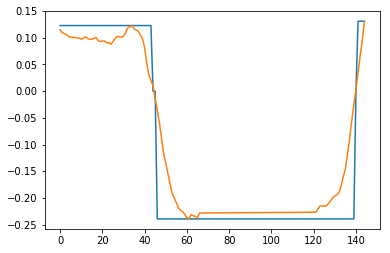

In [25]:
for chain in ordered_chain_list:
    print(len(chain))
    plt.plot([box['right_speed'] if box['right_speed'] is not None else 0 for box in chain[:-1]])
    plt.plot([box['delta_smoothed'][0] for box in chain[:-1]])
    plt.show()

In [34]:
background_bgr = cv2.imread('hor_background2.jpg')
background = cv2.cvtColor(background_bgr, cv2.COLOR_BGR2RGB)

12951


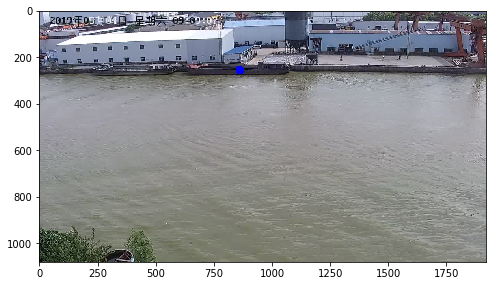

12951


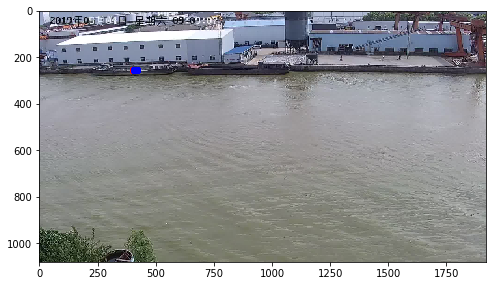

1771


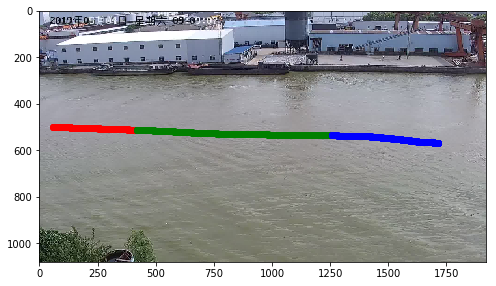

1733


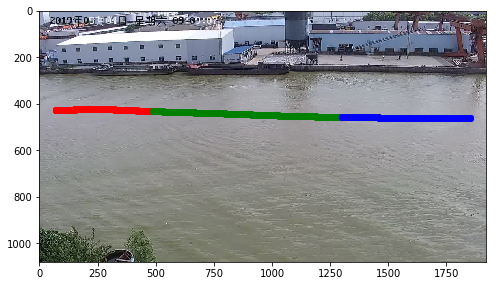

1720


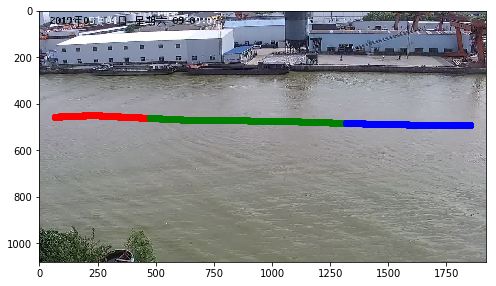

1667


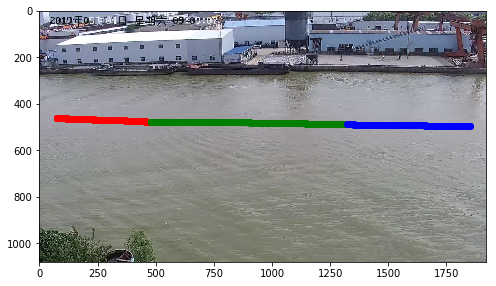

1660


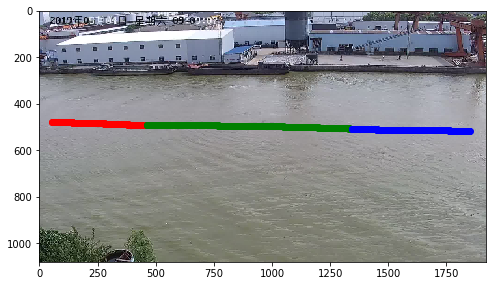

1636


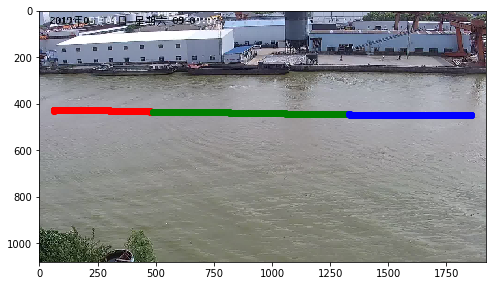

1629


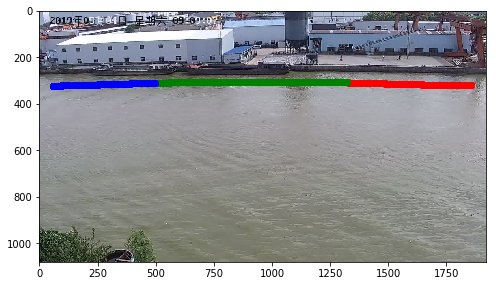

1376


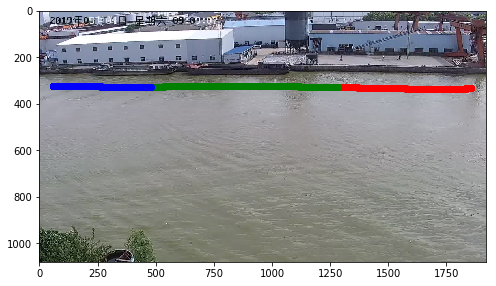

1372


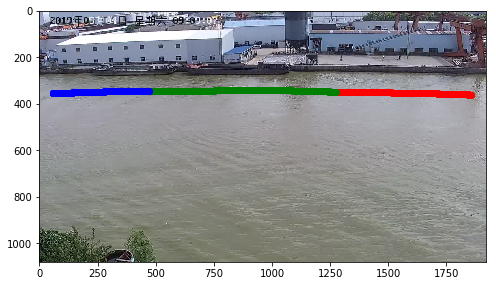

1319


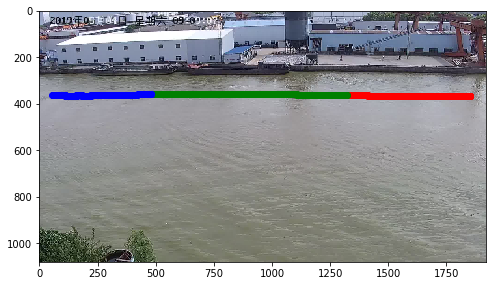

955


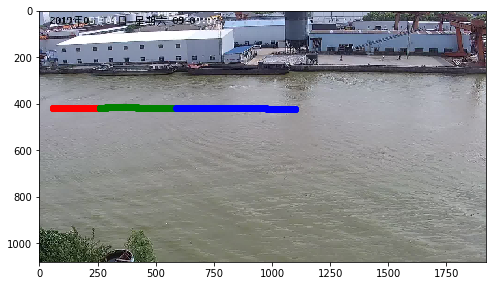

919


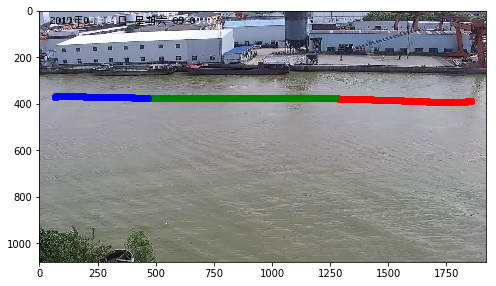

877


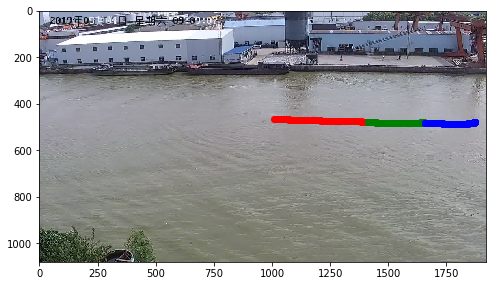

739


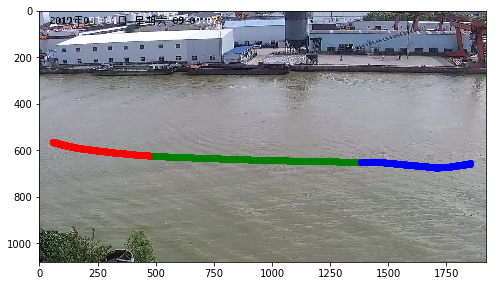

146


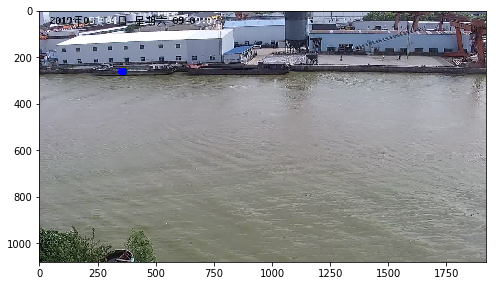

In [35]:
for chain in sorted([chain for chain in collected['chain_list']], reverse=True, key=len)[:21]:
    #pt_arr = np.array([box['pt'] for box in chain])
    pt_smoothed_arr = np.array([box['pt_smoothed'] for box in chain])
    '''
    if len(pt_arr) <2:
        print('suppressed')
        continue
    
    print(len(pt_arr))
    '''
    print(len(pt_smoothed_arr))
    #x,y = pt_arr[:,::2].mean(axis=1),pt_arr[:,1::2].mean(axis=1)
    x_bar,y_bar = pt_smoothed_arr[:,::2].mean(axis=1),pt_smoothed_arr[:,1::2].mean(axis=1)
    
    plt.figure(figsize=(8,6))
    plot_trace(x_bar, y_bar)
    #plot_trace(x,y, alpha=0.3)
    plt.imshow(background)
    plt.show()

In [36]:
net = load_net('weights/ssd300_hor_2.pth')

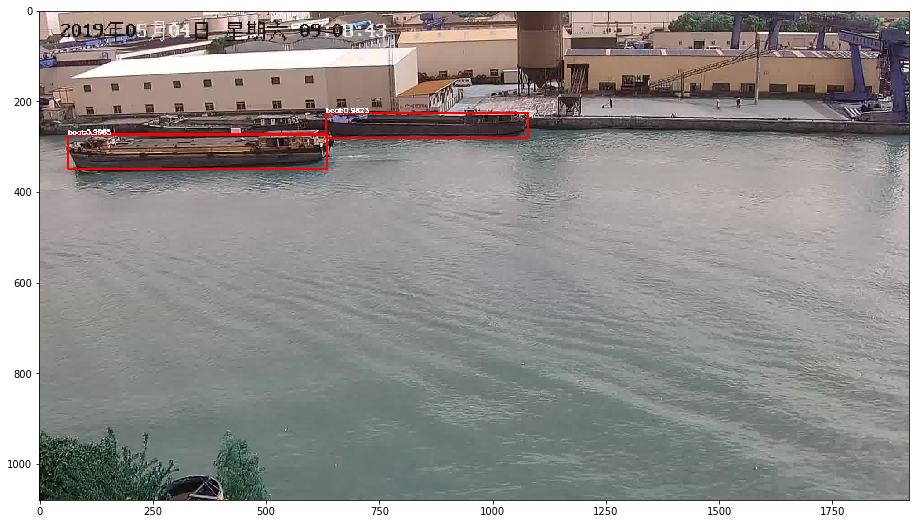

In [37]:
processed = test_basic(net, r'E:\ship_detect_demo\hiv00800_frames\thumb10446.jpg')
plt.figure(figsize=(16,9))
plt.imshow(processed)

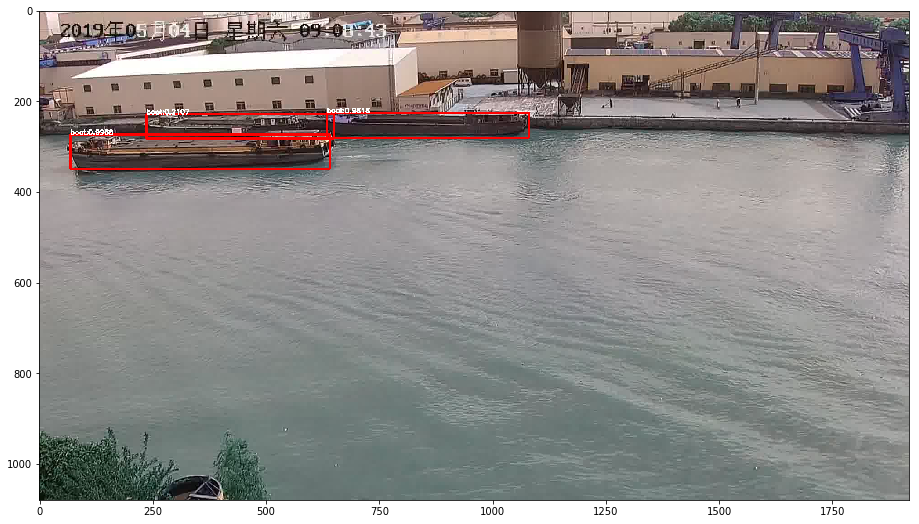

In [48]:
processed = test_basic(net, r'E:\ship_detect_demo\hiv00800_frames\thumb10445.jpg', threshold=0.15)
plt.figure(figsize=(16,9))
plt.imshow(processed)

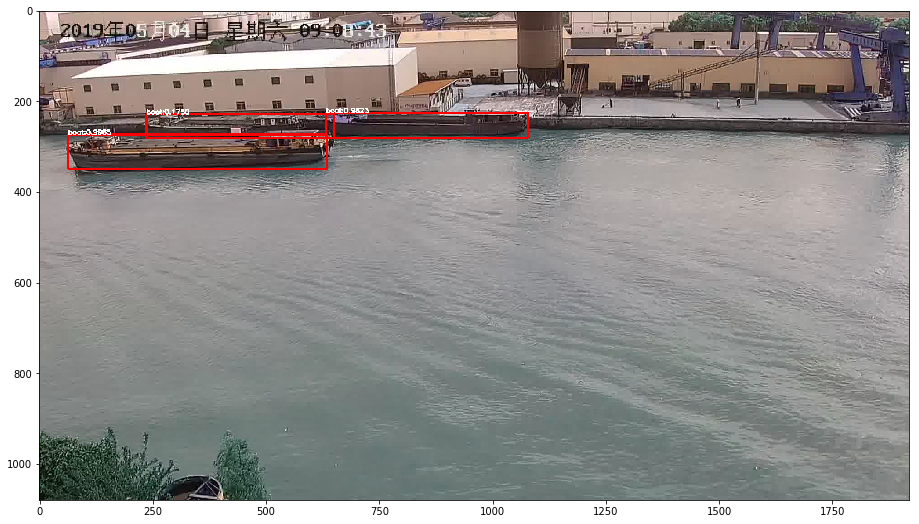

In [49]:
processed = test_basic(net, r'E:\ship_detect_demo\hiv00800_frames\thumb10446.jpg', threshold=0.15)
plt.figure(figsize=(16,9))
plt.imshow(processed)

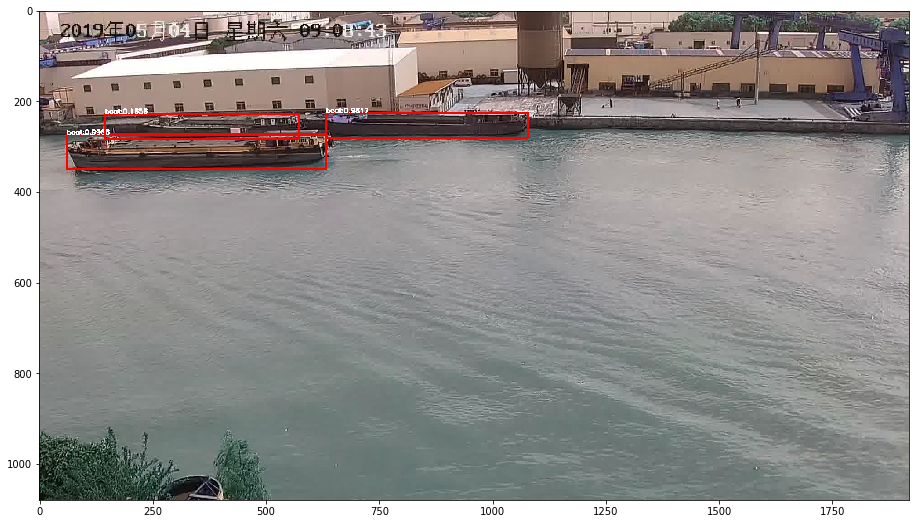

In [50]:
processed = test_basic(net, r'E:\ship_detect_demo\hiv00800_frames\thumb10447.jpg', threshold=0.15)
plt.figure(figsize=(16,9))
plt.imshow(processed)

怪了，这误检不是根本没有出现吗，难道我还用的之前缓存的处理结果？

In [55]:
net = load_net_advanced('weights/ssd300_hor_2.pth', detect_nms_threshold = 0.1)

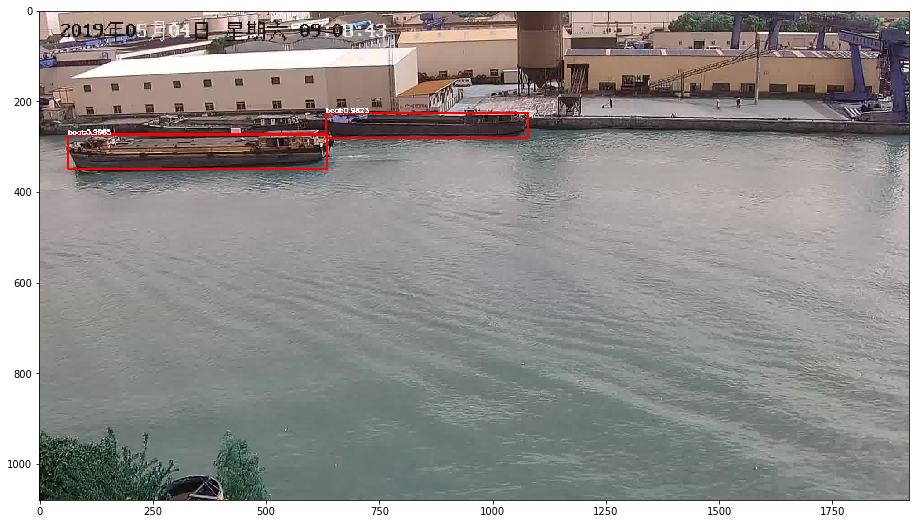

In [56]:
processed = test_basic(net, r'E:\ship_detect_demo\hiv00800_frames\thumb10446.jpg')
plt.figure(figsize=(16,9))
plt.imshow(processed)

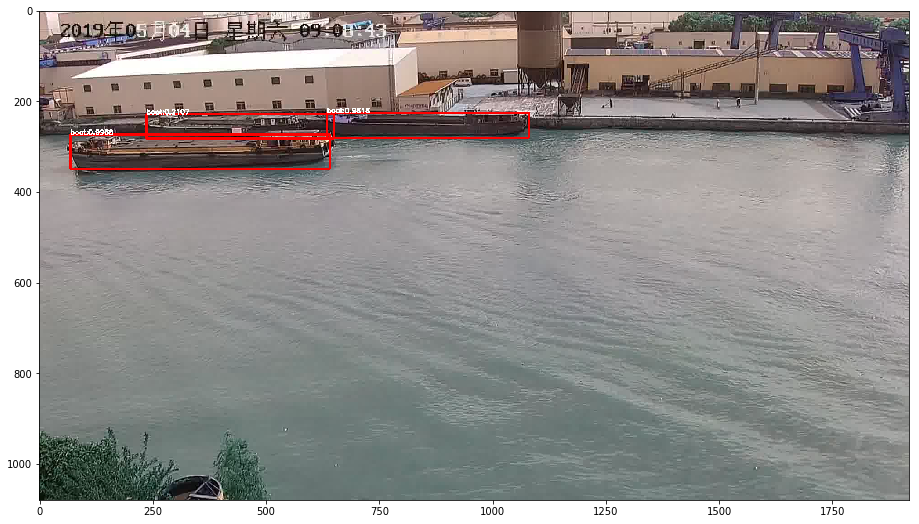

In [57]:
processed = test_basic(net, r'E:\ship_detect_demo\hiv00800_frames\thumb10445.jpg', threshold=0.15)
plt.figure(figsize=(16,9))
plt.imshow(processed)

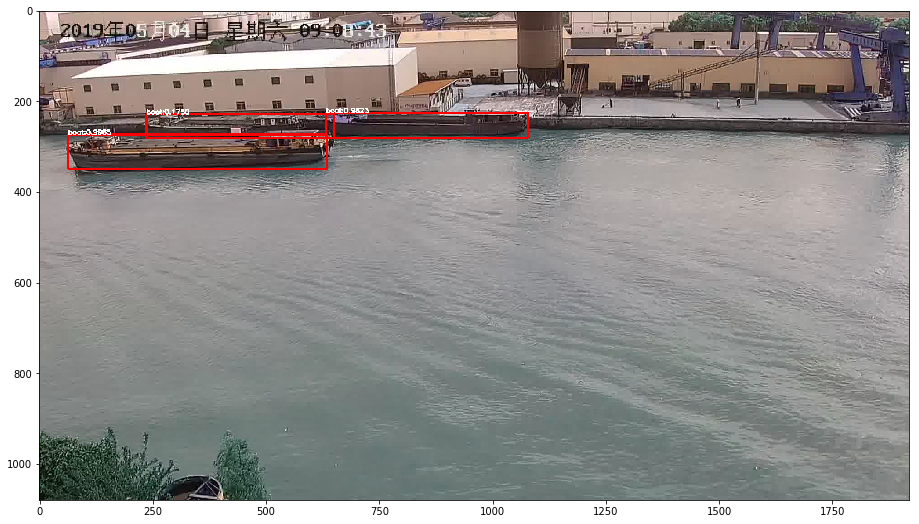

In [58]:
processed = test_basic(net, r'E:\ship_detect_demo\hiv00800_frames\thumb10446.jpg', threshold=0.15)
plt.figure(figsize=(16,9))
plt.imshow(processed)

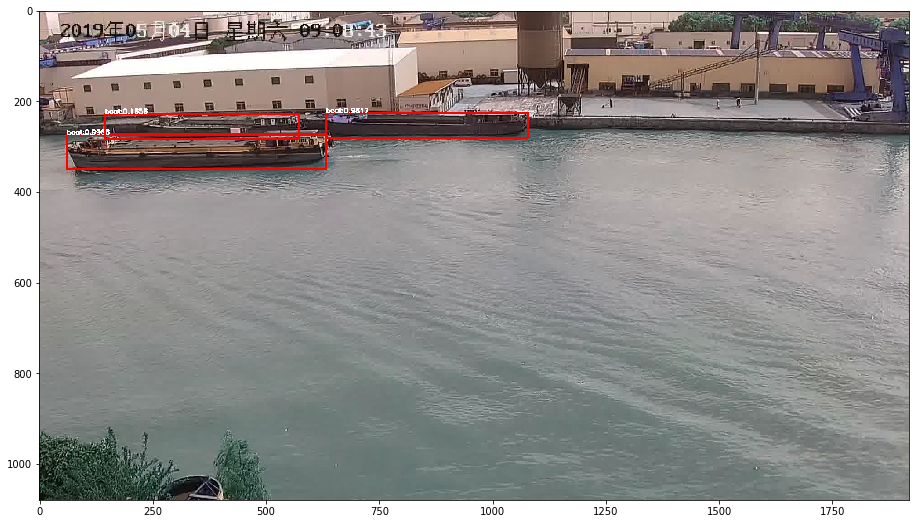

In [59]:
processed = test_basic(net, r'E:\ship_detect_demo\hiv00800_frames\thumb10447.jpg', threshold=0.15)
plt.figure(figsize=(16,9))
plt.imshow(processed)